## PHYS249 Lab 6: Plotting Vectors and Vector Fields

In [ ]:
# you may want to uncomment the next line to get plots to show in a separate window
#%matplotlib qt

### 1) The electric field of a point charge in 2D

Consider an isolated proton. Coulomb's Law says that it generates an electric field:

$$\vec{E}(\vec{r}) = k\frac{q}{r^2}\hat{r}$$

where $q = e = 1.602\times 10^{-19}$ Coulombs is the charge of the proton in S.I. units, $k = 8.988\times10^9$ N$\,$m$^2\,$C$^{-2}$ is the Coulomb constant, $r = |\vec{r}|$ is the norm of the separation vector, and $\hat{r}$ is a unit vector in the $\vec{r}$-direction.
Note that since $\hat{r} = \vec{r}/r$, we can also write this as:

$$\vec{E}(\vec{r}) = k\frac{q}{r^3}\vec{r}$$

Note $\vec{E}$ is what is called a *vector field*, that is a function that associates a vector to every point in space.

Make a plot showing the electric field, as arrows with some appropriate scaling, at various points around a proton located at the origin. (For simplicity you can restrict yourself to a 2D plane)

Some steps are:

   a) pick units and a/or a picture size; this can be any value really
    
   b) given the picture size, pick a scaling for the field, such that the arrows fit sensibly on the plot

   c) pick a set of points at which to calculate and plot the field
    
   d) draw arrows from those points in the correct direction, using the pyplot function $\tt arrow$
    
   e) if you want you can figure out how to add a circle, a plus sign and or "e" beside the charge, a scale bar, etc.


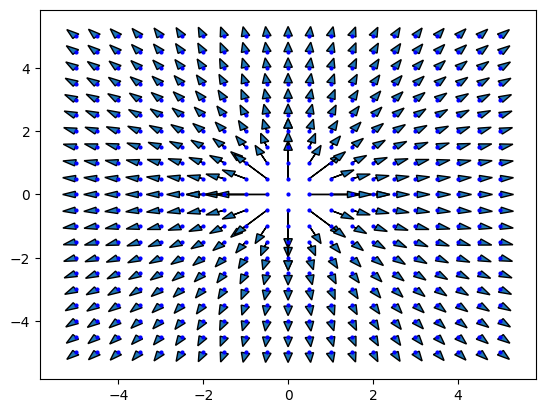

In [43]:
from numpy import linspace, log, zeros, arange, pi
from matplotlib import pyplot as plt

points = 21

k = 8.998e9
k = 2
# q = 1.602e-19
q = 1
xrange = [-5,5]
yrange = [-5,5]
# x = linspace(-5,5,51)
y = linspace(-5,5,points)
grid = [(linspace(-5, 5, points), [y[i]] * points) for i in range(points)]
# print(grid)


def scaleMagnitude(r):
    return 0.2*r

point = [0, 0]

Ef = lambda r3 : k*q/(r3)

mags = zeros([points,points])
for i in range(points):
    plt.plot(grid[i][0], grid[i][1], "bo", markersize = 2)
    for j in range(points):
        x = grid[i][0]
        y = grid[j][1]
        if(x[i]==0 and y[j]==0):
            continue
        # print(x[i])
        r3 = (x[i]*x[i] + y[j]*y[j])**(3/2)
        # if(r3 == 0):
        #     print(x[i], y[j])
        # print(r2)
        mags[i][j] = scaleMagnitude(Ef(r3))

        
        dx = mags[i][j]*x[i]

        dy = mags[i][j]*y[j]
        # plt.arrow(x[i], y[i], x[i]/mags[i][j], y[i]/mags[i][j])
        plt.arrow(x[i], y[j], dx, dy, head_width = 0.2)

# plt.plot(x, y)
plt.show()


### 2) The gravitational field of the Earth-Moon System in 2D

The expression for the acceleration, or "gravitational" field produced by the Earth is similar to Coulomb's law:

$$\vec{g}_E(\vec{r}) = -G\frac{M_E}{r^2}\hat{r}$$

where $G = 6.67 \times 10^{-11}$ N$\,$kg$^{-2}$m$^2$ is Newton's constant, $M_E = 5.972 \times 10^{24}$ kg is the mass of the Earth, and $\vec{r}$ is the position vector, as before.

For the Moon, the expression for the field $g_M$ is similar, with the mass of the Moon $M_M = 7.35\times10^{22}$ kg substituted for the Mass of the Eath, and $\vec{r}$ now indicating the position with respect to the Moon.

Make a plot showing the gravitational field of the combined Earth-Moon system, 

$$\vec{g}_{tot}(\vec{r}) = \vec{g}_E(\vec{r}-\vec{r}_E) + \vec{g}_M(\vec{r}-\vec{r}_M)\,,$$

where $\vec{r}_E$ is the location of the centre of the Earth and $\vec{r}_M$ is the location of the centre of the Moon.
The easiest way to do this is to calculate the Earth field and the Moon field separately, (similarly to the Coulomb field in question 1, but now with different centres for the two fields) and then add the two component-wise.

You will need to pick a scale for your plot and for the Earth-Moon distance, 384400 km, and also a scale for your arrows (i.e. decide what the value of $GM_E$ will be, given your choice of length scale).

Note we should really scale by the Moon-Earth mass ratio which is 7.35/597.2 = 0.0012; let's take a larger ratio, e.g. 0.3, for clarity.

Also close to the Earth or the Moon, the vectors will get really big, so put in a condition to only plot if we are more than 0.2 distance units away from both.


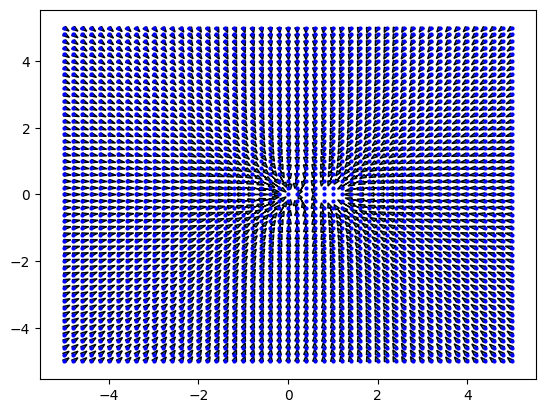

In [87]:
from numpy import cos, sin
npoints = 51 
G = 1
ME = 1
Mm = 0.3
Gf = lambda r3, M : -G * M / r3
def scaleMagnitude2(r):
    return 0.1*r
xE = 0
yE = 0
xM = 1
yM = 0

# for r in arange(0.5, 1.5, 0.1):
#     theta = arange(0, 2.01*pi, 2*pi/npoints)
#     x = r * cos(theta)
#     y = r * sin(theta)
#     plt.plot(x, y, "bo", markersize = 0.5)
#     for i in range(npoints):
#         # for j in range(npoints):
#         # dE = ((x[i] - xE)*(x[i]-xE) + (y[i]-yE)*(y[i]-yE))**(3/2)
#         # fE = scaleMagnitude2(Gf(dE, ME))
#         # dx = fE*(x[i])
#         # dy = fE*(y[i])
#         # plt.arrow(x[i], y[i], dx, dy, head_width = 0.05)

#         dM = ((x[i] - xM)*(x[i] - xM) + (y[i]-yM)*(y[i]-yM))**(3/2)
#         fM = 0.00001*scaleMagnitude2(Gf(dM, Mm))
#         dx2 = fM*(x[i])
#         dy2 = fM*(y[i])
#         plt.arrow(x[i], y[i], dx2, dy2, head_width = 0.05)



# plt.show()

xrange = [-5,5]
yrange = [-5,5]
# x = linspace(-5,5,51)
y = linspace(-5,5,npoints)
grid = [(linspace(-5, 5, npoints), [y[i]] * npoints) for i in range(npoints)]

mags = zeros([npoints,npoints])
for i in range(npoints):
    plt.plot(grid[i][0], grid[i][1], "bo", markersize = 2)
    for j in range(npoints):
        x = grid[i][0]
        y = grid[j][1]
        # if(x[i]==0 and y[j]==0):
        #     continue
        # print(x[i])

        dE = ((x[i] - xE)*(x[i]-xE) + (y[i]-yE)*(y[i]-yE))**(3/2)
        if(dE < 0.1):
            continue
        fE = scaleMagnitude2(Gf(dE, ME))
        dx = fE*(x[i])
        dy = fE*(y[i])

        mags[i][j] = scaleMagnitude(Ef(dE))

        dM = ((x[i] - xM)*(x[i] - xM) + (y[i]-yM)*(y[i]-yM))**(3/2)

        if(dM < 0.1):
            continue

        fM = 2*scaleMagnitude2(Gf(dM, Mm))
        dx2 = fM*(x[i] - xM)
        dy2 = fM*(y[i] - yM)


        # fT = fM + fE 
        dxT = dx + dx2 
        dyT = dy + dy2
        plt.arrow(x[i], y[i], dxT, dyT, head_width = 0.1)
        
        # dx = mags[i][j]*x[i]

        # dy = mags[i][j]*y[j]
        # plt.arrow(x[i], y[i], x[i]/mags[i][j], y[i]/mags[i][j])
        # plt.arrow(x[i], y[j], dx, dy, head_width = 0.2)


### 3) The gravitational field of the Earth-Moon System in 3D

Now let's try the same calculation in 3D. We will need some modifications:

- reduce the number of points for visibility

- add z to the sample point coordinates; also use meshgrid to create a 3D array for each of the x, y and z coordinates of the sample points

- calculate arrays of distances to the Earth and distances to the Moon for each sample point

- use the 3D methods/projections $\tt Axes3D$ from mplot3d, gca

The result doesn't look great because of the sample points close to the Earth and Moon; it would take some work to fix this...

### 4) The tidal field of the Moon near the Earth

Finally, we can try to plot the *tidal* field of the Moon. This is the gravitational field of the Moon on Earth, *relative* to its mean value. 

Specifically, we can calculate this as:
$$\vec{g}_{tid}(\vec{r}) = \vec{g}_M(\vec{r}-\vec{r}_M) + \vec{g}_M(\vec{r_E}-\vec{r}_M)\,.$$

Where $\vec{r}_E$ is the location of the centre of the Earth, as before.

In this case, the tidal field varies strongly around the location of the Earth, so it makes sense to zoom in on the regionaround the Earth; you might use the radius of the Earth, $r_\oplus = 6371$ km, as a reference scale for the plot, plotting out to a few $r_\oplus$.

